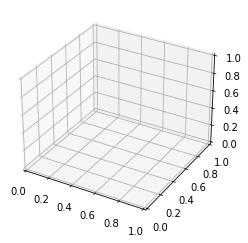

In [1]:
# Matplotlib 설치본에 포함된 mplot3d 툴킷
from mpl_toolkits import mplot3d

# 모듈 import 후 일반 축 생성 루틴에 projection="3d" 키워드 전달
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection="3d")

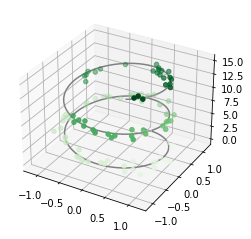

In [3]:
# 3차원 점과 선
# (x, y, z) | ax.plot3D, ax.scatter3D
ax = plt.axes(projection="3d")

# 3차원 선을 위한 데이터
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)

ax.plot3D(xline, yline, zline, "gray")

# 3차원 산점도를 위한 데이터
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata ,zdata, c=zdata, cmap="Greens");

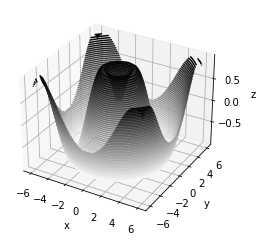

In [4]:
# 3차원 등고선 플롯
# plt.contour3D

def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# 3차원 등고선 플롯 생성
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.contour3D(X, Y, Z, 50, cmap="binary")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z");

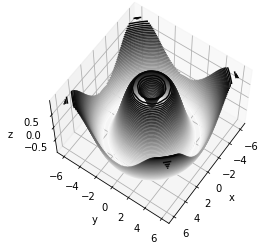

In [16]:
# view_init(고도, 방위각) -> change perspective view
ax.view_init(60, 35)
fig

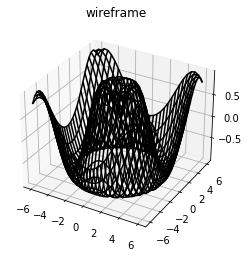

In [17]:
# 와이어프레임과 표면도
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z, color="black")
ax.set_title("wireframe");

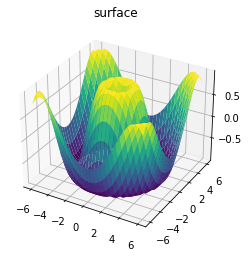

In [19]:
# 표면도 (채워진 다각형에 색상 지도 추가)
ax = plt.axes(projection="3d")
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap="viridis", edgecolor="none")
ax.set_title("surface");

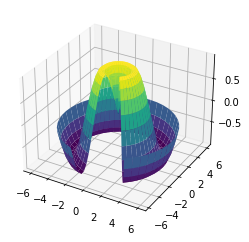

In [23]:
# 표면도를 위한 값 그리드 -> 직선일 필요는 없다
# 극좌표 그리드 (partial polar grid)
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection="3d")
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap="viridis", edgecolor="none");



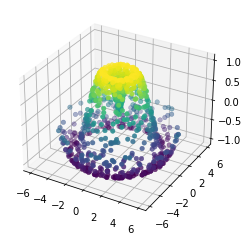

In [25]:
# 표면 삼각측량법
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

# 점으로 산점도 만들기
ax = plt.axes(projection="3d")
ax.scatter(x, y, z, c=z, cmap="viridis", linewidth=0.5);

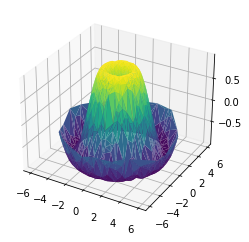

In [26]:
# ax.plot_trisurf -> 인접한 점들 사이에 형성된 삼각형 집합으로 표면 구성
ax = plt.axes(projection="3d")
ax.plot_trisurf(x, y, z, cmap="viridis", edgecolor="none");

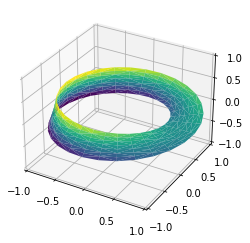

In [27]:
# 예제: 뫼비우스 띠 시각화
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

phi = 0.5 * theta

# x-y 평면의 반지름
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

# 기본 모수화에서 삼각 측량법 정의
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection="3d")
ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap="viridis", linewidths=0.2);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);